[This](https://github.com/sachabinder/Burgers_equation_simulation/blob/main/Burgers_solver_SP.py) github repo has code using the spectral method to solve burgers equation. Lets replicate it then see if the quantum FFT can also be used?...

Spectral Derivative, 1D:
\begin{split}
f'(x) = \textrm{ifft}(ik \space \textrm{fft}(f(x)))
\end{split}

Burgers' Equation:
\begin{split}
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = \nu \frac{\partial^2 u}{\partial x^2}
\end{split}

Spectral timestep of Burger's Equation:
\begin{split}
\frac{\Delta u}{\Delta t} = -u \frac{\partial u}{\partial x} + \frac{\partial^2 u}{\partial x^2}
\end{split}

\begin{split}
\frac{\partial u}{\partial x} = \textrm{ifft}(ik \space \textrm{fft}(u))
\end{split}

\begin{split}
\frac{\partial^2 u}{\partial x^2} = \textrm{ifft}(-k^2 \space \textrm{fft}(u))
\end{split}

In [79]:
import numpy as np
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [80]:
mu = 1
nu = 0.01 #kinematic viscosity coefficient
    
#Spatial mesh
L_x = 10 #Range of the domain according to x [m]
dx = 0.01 #Infinitesimal distance
N_x = int(L_x/dx) #Points number of the spatial mesh
X = np.linspace(0,L_x,N_x) #Spatial array

#Temporal mesh
L_t = 8 #Duration of simulation [s]
dt = 0.025  #Infinitesimal time
N_t = int(L_t/dt) #Points number of the temporal mesh
T = np.linspace(0,L_t,N_t) #Temporal array

#Wave number discretization
k = 2*np.pi*np.fft.fftfreq(N_x, d = dx)

#Def of the initial condition    
u0 = np.exp(-(X-3)**2/2) #Single space variable fonction that represent the wave form at t = 0
# viz_tools.plot_a_frame_1D(X,u0,0,L_x,0,1.2,'Initial condition')

############## EQUATION SOLVING ###############

#Definition of ODE system (PDE ---(FFT)---> ODE system)
def burg_system(u,t,k,mu,nu):
    #Spatial derivative in the Fourier domain
    u_hat = np.fft.fft(u)
    u_hat_x = 1j*k*u_hat
    u_hat_xx = -k**2*u_hat
    
    #Switching in the spatial domain
    u_x = np.fft.ifft(u_hat_x)
    u_xx = np.fft.ifft(u_hat_xx)
    
    #ODE resolution
    u_t = -mu*u*u_x + nu*u_xx
    return u_t.real
    

#PDE resolution (ODE system resolution)
U = odeint(burg_system, u0, T, args=(k,mu,nu,), mxstep=5000)

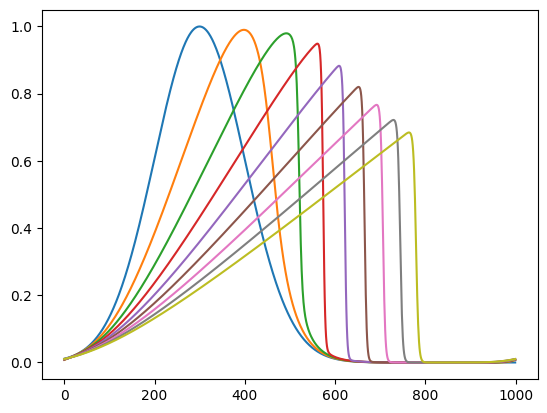

In [81]:
plt.plot(u0)
plt.plot(U[40])
plt.plot(U[80])
plt.plot(U[120])
plt.plot(U[160])
plt.plot(U[200])
plt.plot(U[240])
plt.plot(U[280])
plt.plot(U[319])

How do you manually compute the wave number? Like [this](https://math.stackexchange.com/questions/1311196/computing-wavenumbers-for-discrete-fourier-transform).

"
You perform FFT on N=256
 points with equal distance 2π/N
 between them and as a result you get 256
 points in frequency domain. You want to know which frequency values these correspond to. You can consider them to be indexed as [-128,128) or [-128,127] (integers)

The leftmost point will be −π/Δx
 where Δx
 is the distance between your points before FFT. Rightmost point will not be π/Δx
 since it will be non symmetric.

So, for k, you need 256 linearly spaced points starting from −π/(2π/N)
 increasing with increments 2π/(NΔx)=1
"

In [82]:
# this computes the wave numbers in cycles per unit of sample spacing. multiply by 2pi to get radians per unit of sample spacing
# n = 10
# d = 1
# inc = 1 / (n * d)
# wavestart = -0.5 / d
# k = np.linspace(wavestart, wavestart + inc * n, num=10, endpoint=False)
# k is array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4])
# note that np fftfreq would return 0. ,  0.1,  0.2,  0.3,  0.4, -0.5, -0.4, -0.3, -0.2, -0.1
u_hat = np.fft.fft(u0)
u_hat_x = 1j*k*u_hat
u_hat_xx = -k**2*u_hat

#Switching in the spatial domain
u_x = np.fft.ifft(u_hat_x)
u_xx = np.fft.ifft(u_hat_xx)

#ODE resolution
u_t = -mu*u0*u_x + nu*u_xx

In [83]:
u0.shape, u_hat.shape, k.shape, u_hat_x.shape, u_x.shape

((1000,), (1000,), (1000,), (1000,), (1000,))

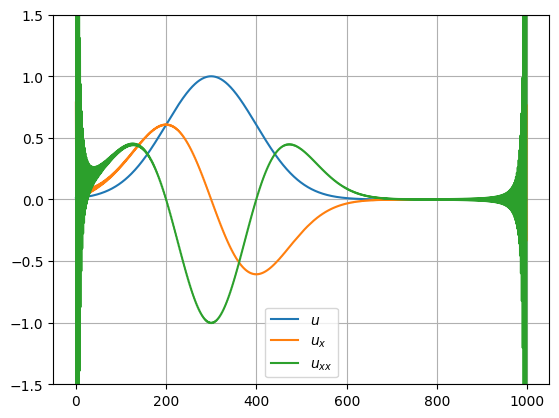

In [84]:
plt.plot(u0, label="$u$")
plt.plot(u_x.real, label="$u_x$")
plt.plot(u_xx.real, label="$u_{xx}$")
plt.ylim([-1.5, 1.5])
plt.grid()
plt.legend()